In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2025-10-26 11:40:59.032689: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761478859.339408      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761478859.441159      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [98]:
titanic_train =pd.read_csv('/kaggle/input/titanic/train.csv'
)
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [100]:
titanic_gender = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
titanic_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [101]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
   updated_titanic = titanic_train.drop(['Cabin' , 'Name' ,'PassengerId' , 'Ticket'] , axis=1)


In [104]:
updated_titanic.head()
updated_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [105]:

updated_titanic['Embarked'].fillna(updated_titanic['Embarked'].mode()[0], inplace=True)


updated_titanic['Age'].fillna(updated_titanic['Age'].median(), inplace=True)


print("Missing values AFTER filling:")
print(updated_titanic.isnull().sum())

Missing values AFTER filling:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


/tmp/ipykernel_37/2294089578.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  updated_titanic['Embarked'].fillna(updated_titanic['Embarked'].mode()[0], inplace=True)
/tmp/ipykernel_37/2294089578.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [106]:
updated_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [107]:
final_titanic  =pd.get_dummies(
    updated_titanic ,
    columns = ['Sex' , 'Embarked'] ,
    drop_first =True ,
    dtype = int
)
print(final_titanic.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500         1           0   
1         1       1  38.0      1      0  71.2833         0           0   
2         1       3  26.0      0      0   7.9250         0           0   
3         1       1  35.0      1      0  53.1000         0           0   
4         0       3  35.0      0      0   8.0500         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


In [108]:
X = final_titanic.drop('Survived' , axis=1)
y = final_titanic.Survived
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [109]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42
)

In [119]:
input_shape = [X_train.shape[1]]
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    
   
    layers.BatchNormalization(), 
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    
    layers.BatchNormalization(), 
    
    
    layers.Dense(1, activation='sigmoid') 
])
model.compile(
    optimizer='adam' ,
    loss='binary_crossentropy' ,
    metrics=['binary_accuracy'] ,
 )

early_stopping = EarlyStopping(
    patience=25,
    min_delta=0.001,
    restore_best_weights=True,
)

In [120]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=1000, 
    callbacks=[early_stopping],
    verbose=1 )

Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - binary_accuracy: 0.5622 - loss: 0.7936 - val_binary_accuracy: 0.8156 - val_loss: 0.5654
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.7309 - loss: 0.5627 - val_binary_accuracy: 0.8101 - val_loss: 0.5282
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.7672 - loss: 0.5011 - val_binary_accuracy: 0.8156 - val_loss: 0.5124
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.7884 - loss: 0.4801 - val_binary_accuracy: 0.8156 - val_loss: 0.4938
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.7613 - loss: 0.5114 - val_binary_accuracy: 0.8101 - val_loss: 0.4844
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.7984 - loss: 0.4682 - val_binary_accuracy: 0.8045 - val_loss: 0.4788
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.8062 - loss: 0.4516 - val_binary_accuracy: 0.7989 - val_loss: 0.4726
Epoc

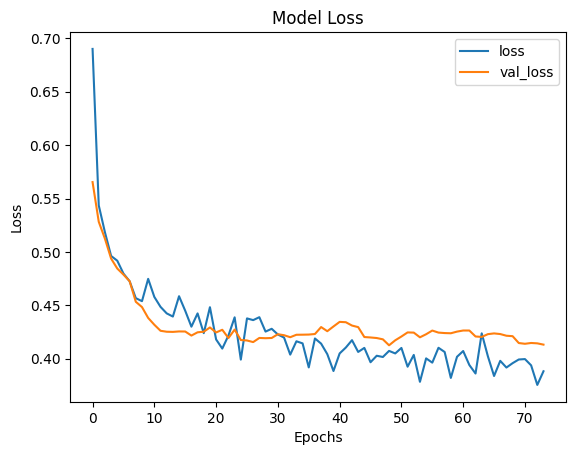

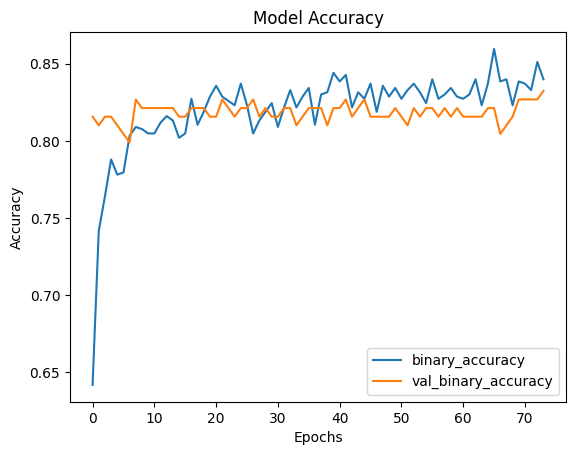

In [121]:


history_df = pd.DataFrame(history.history)


history_df.loc[:, ['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [130]:
passenger_ids = titanic_test['PassengerId']

age_median = X['Age'].median()
titanic_test['Age'] = titanic_test['Age'].fillna(age_median)


fare_median = X['Fare'].median()
titanic_test['Fare'] = titanic_test['Fare'].fillna(fare_median)
embarked_mode = 'S'
titanic_test['Embarked'] = titanic_test['Embarked'].fillna(embarked_mode)


titanic_test['Sex_male'] = (titanic_test['Sex'] == 'male').astype(int)


titanic_test['Embarked_Q'] = (titanic_test['Embarked'] == 'Q').astype(int)
titanic_test['Embarked_S'] = (titanic_test['Embarked'] == 'S').astype(int)

X_test = titanic_test.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)


X_test = X_test[X.columns]

In [131]:
X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [135]:
predicted_labels = (predictions > 0.5).astype(int).flatten()

submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predicted_labels  
})

submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!
